In [33]:
import matplotlib.pyplot as plt
import numpy as np
import eFELExt
import re

In [34]:
n = 44+9

In [35]:
note = [ '' ] * n

# AP amplitude check

control 7640 9 | 0
AP_amplitude:	 34.9 	<<<


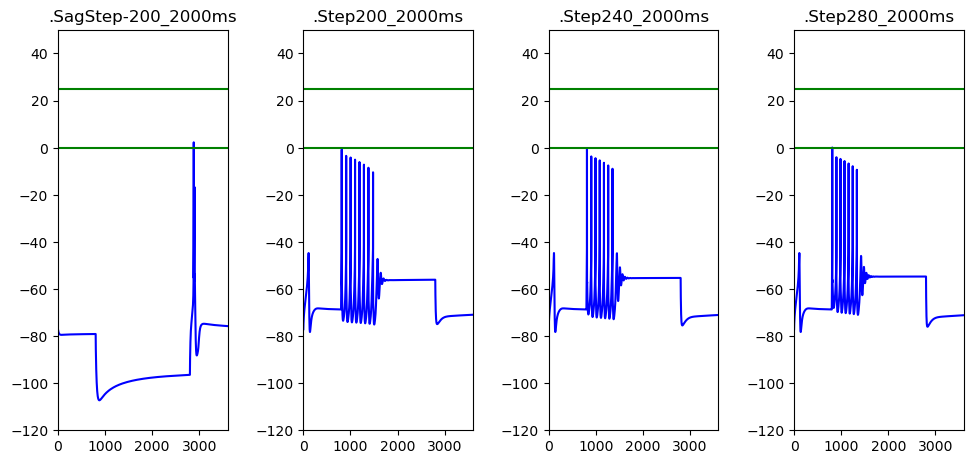

AP too short



control 9453 2 | 1
AP_amplitude:	 32.9 	<<<


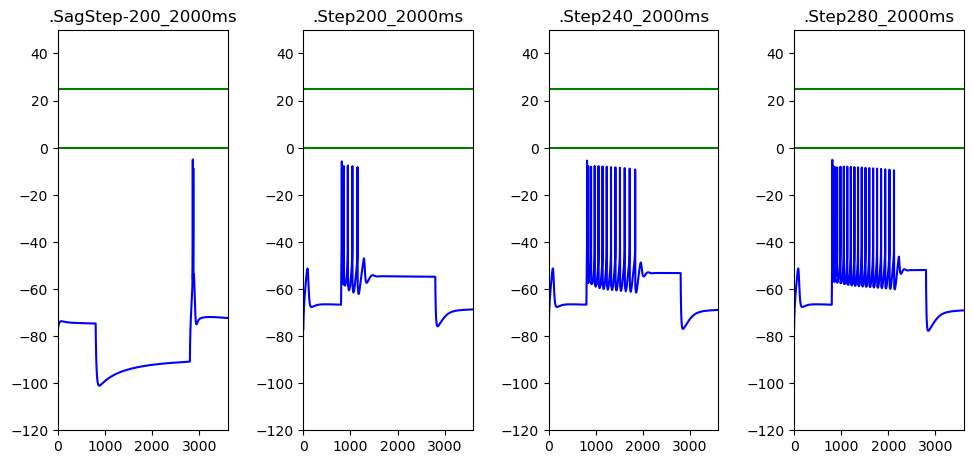

AP too short



control 12278 4 | 2
AP_amplitude:	 73.5 	<<<


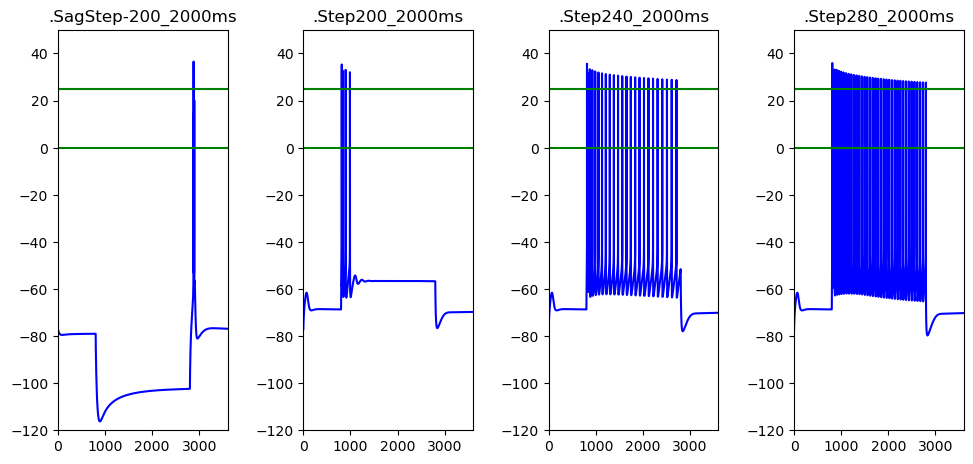

AP too tall



control 14014 9 | 3
AP_amplitude:	 44.3 	


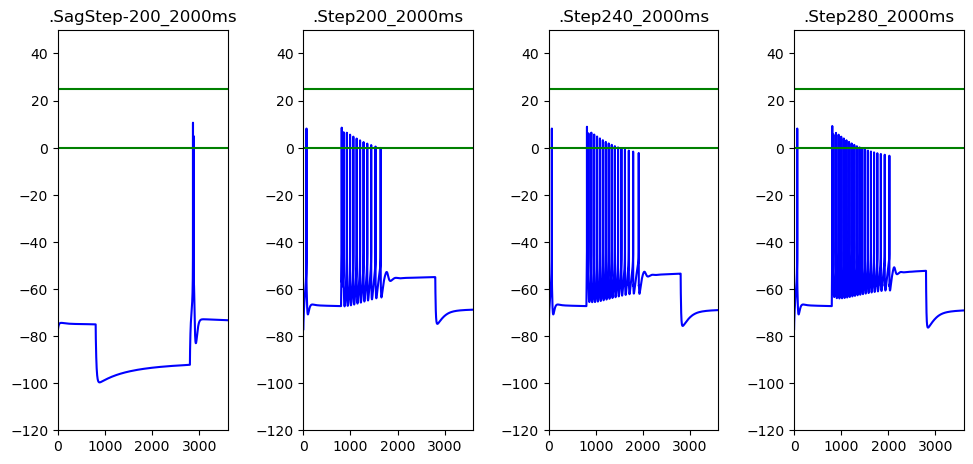





control 15807 11 | 4
AP_amplitude:	 24.3 	<<<


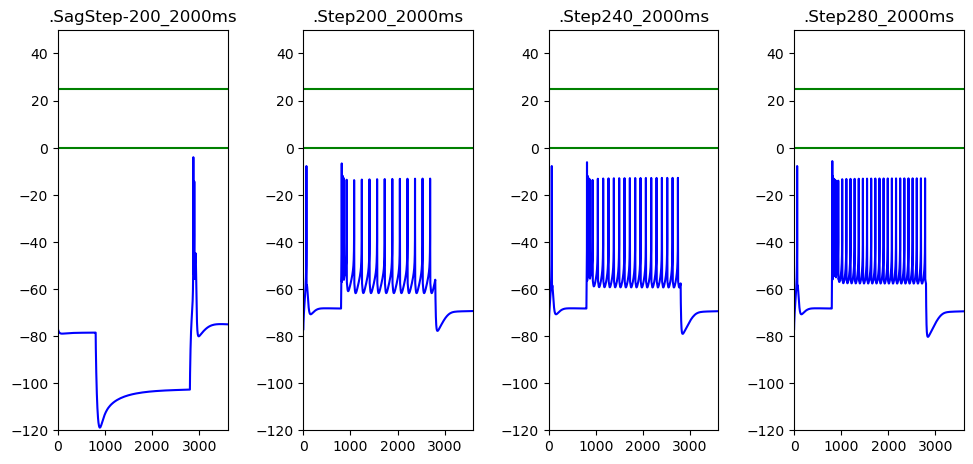

AP too short



control 16021 5 | 5
AP_amplitude:	 39.1 	


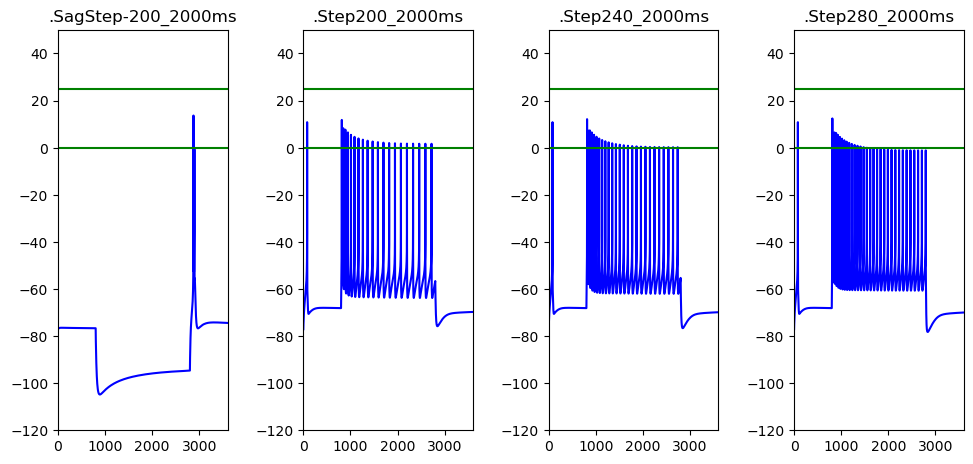





control 16299 10 | 6
AP_amplitude:	 33.5 	<<<


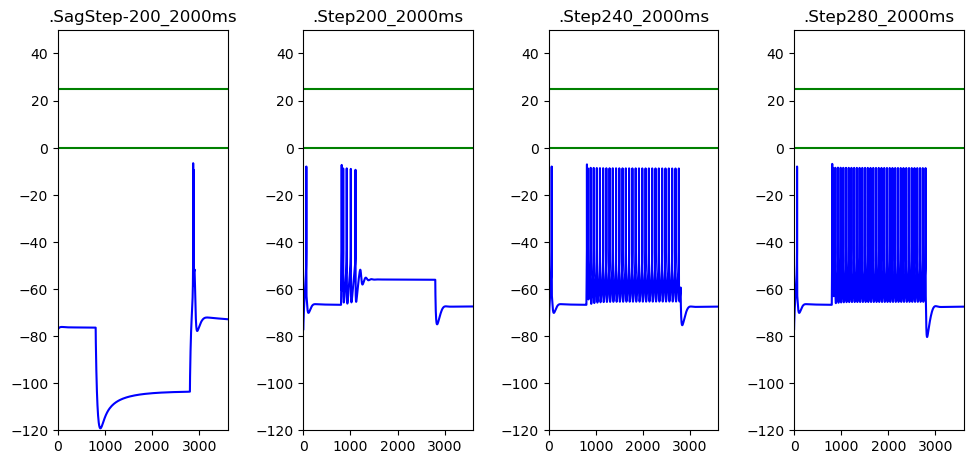

AP too short



control 19075 10 | 7
AP_amplitude:	 23.2 	<<<


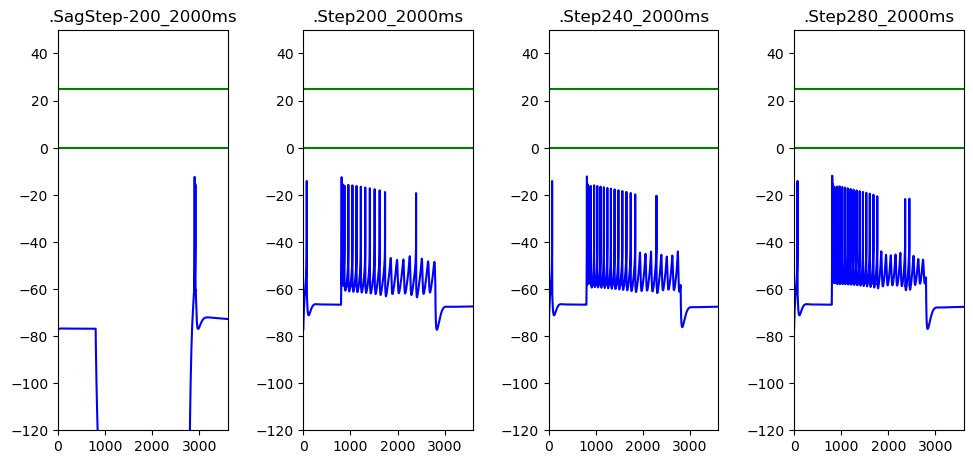

AP too short



control 19246 10 | 8
AP_amplitude:	 22.5 	<<<


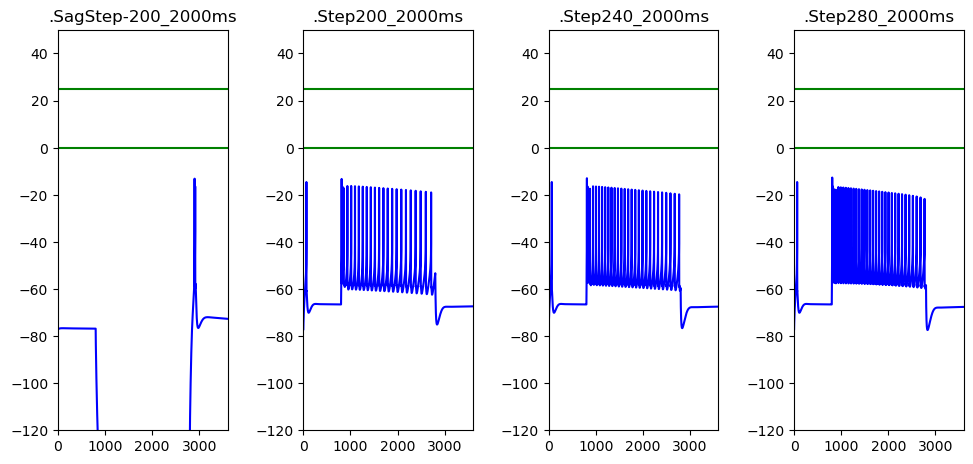

AP too short



lesioned 1061 2 | 9
AP_amplitude:	 49.7 	


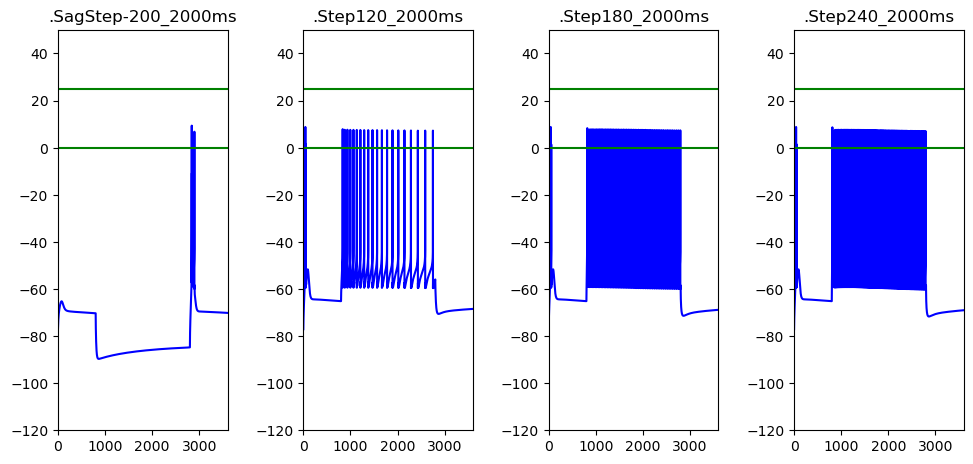





lesioned 2027 4 | 10
AP_amplitude:	 63.0 	<<<


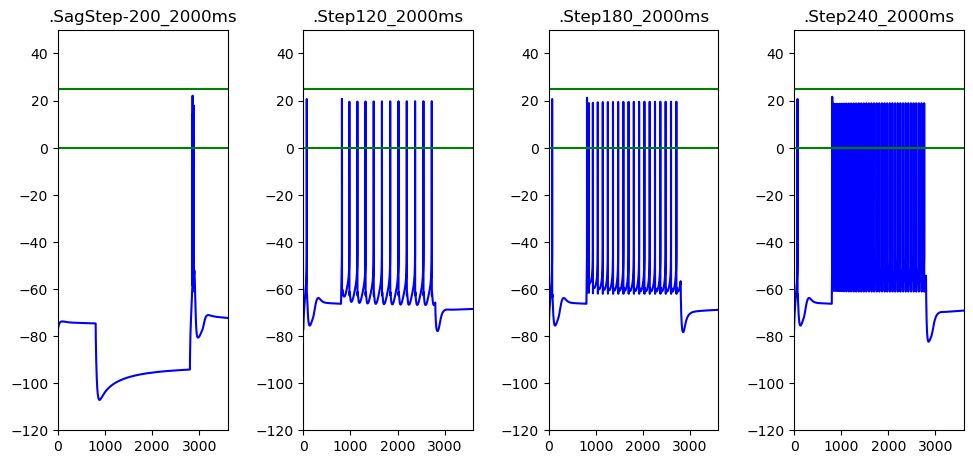

AP too tall



lesioned 2629 2 | 11
AP_amplitude:	 65.5 	<<<


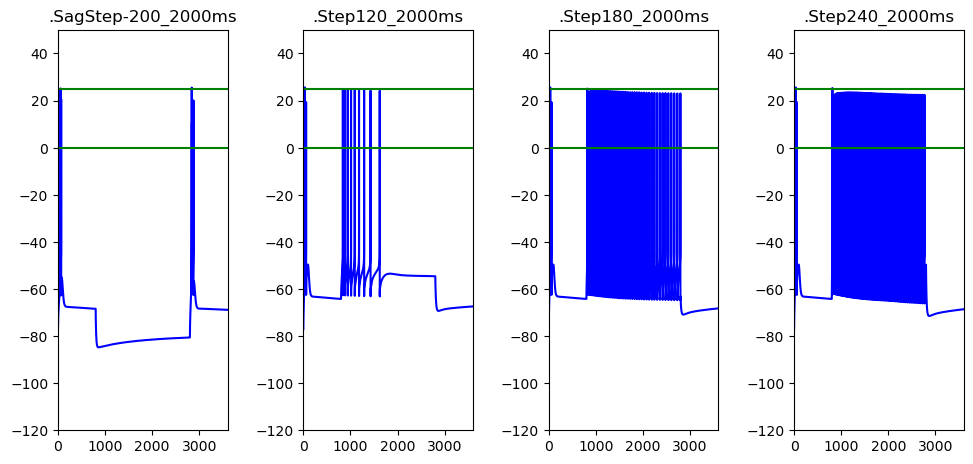

AP too tall



lesioned 2863 0 | 12
AP_amplitude:	 23.8 	<<<


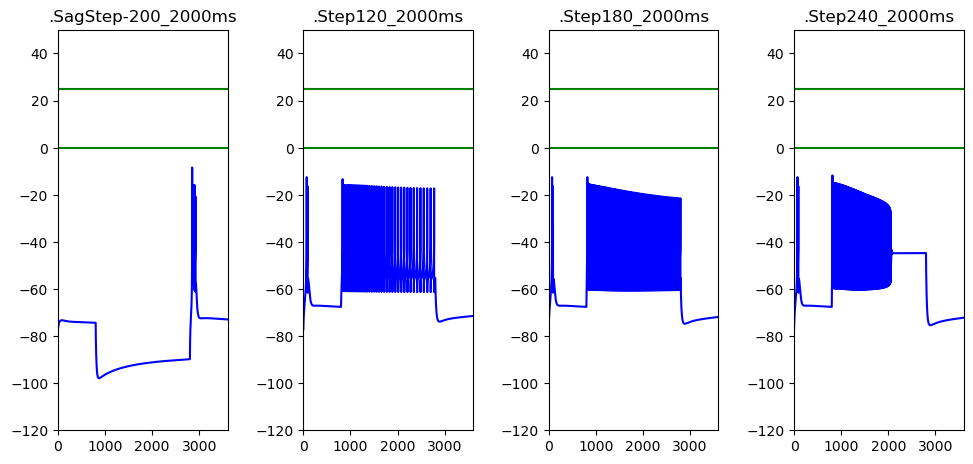

AP too short



lesioned 3235 1 | 13
AP_amplitude:	 35.4 	


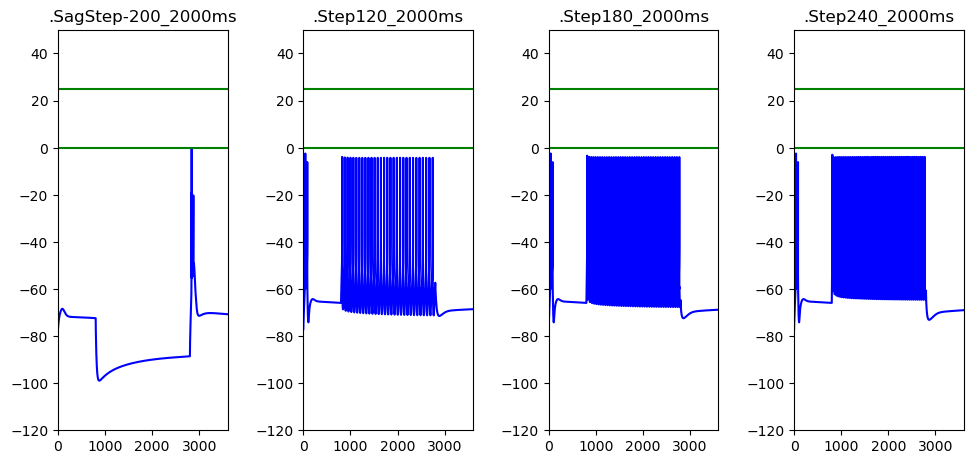





lesioned 3683 0 | 14
AP_amplitude:	 82.3 	<<<


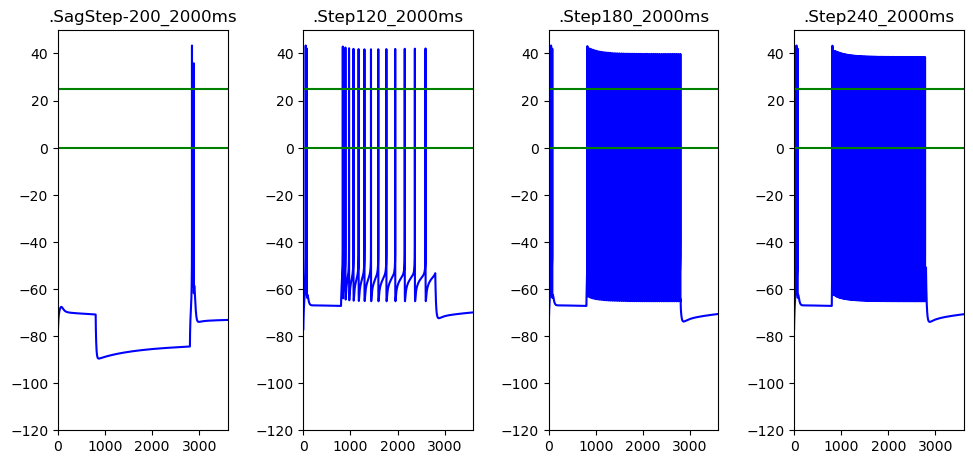

AP too tall



lesioned 4685 4 | 15
AP_amplitude:	 44.7 	


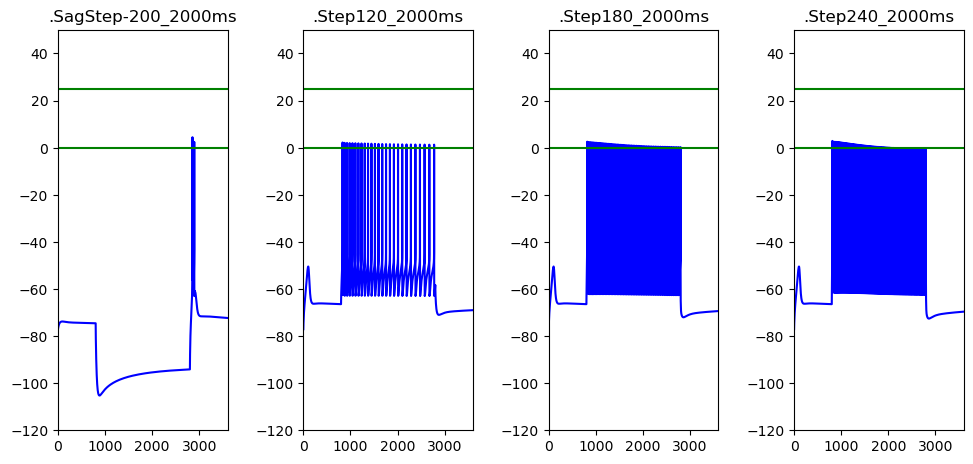





lesioned 5652 2 | 16
AP_amplitude:	 34.5 	<<<


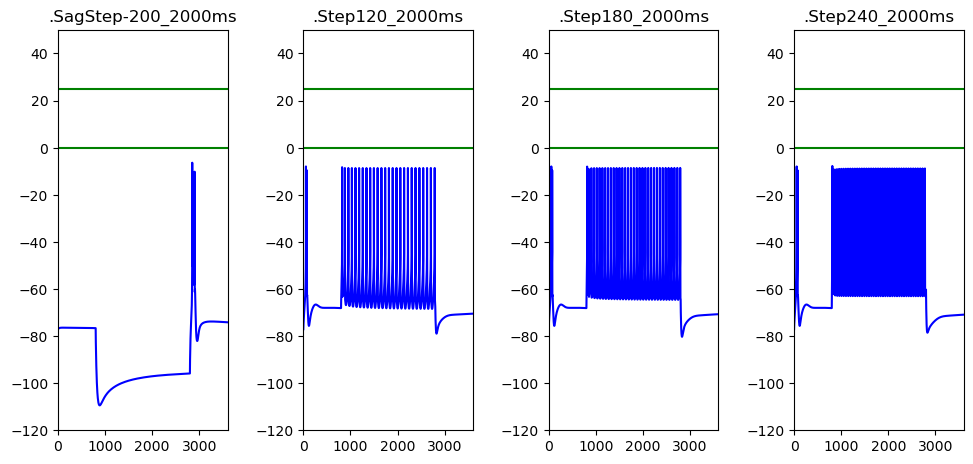

AP too short



lesioned 6412 4 | 17
AP_amplitude:	 82.8 	<<<


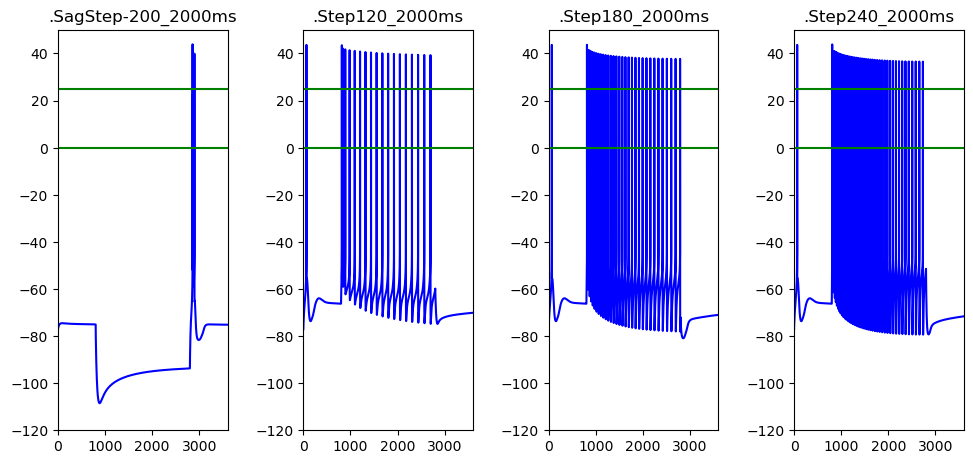

AP too tall



lesioned 6611 4 | 18
AP_amplitude:	 61.9 	<<<


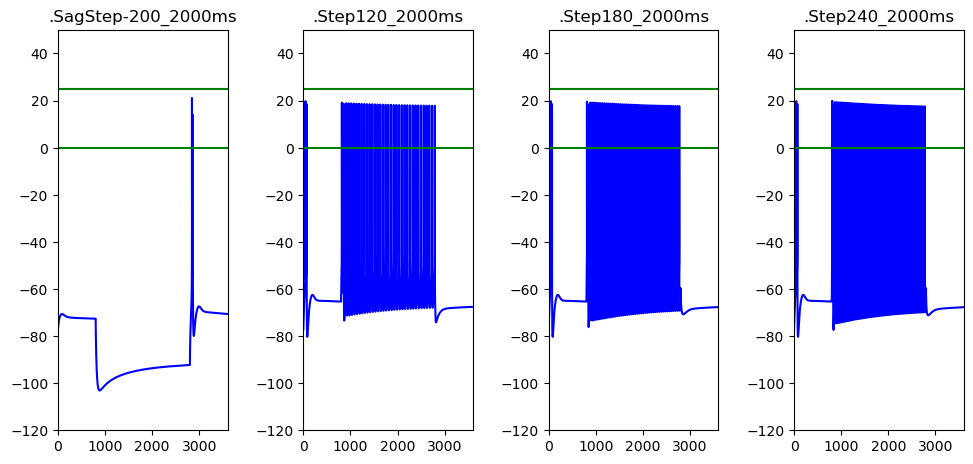

AP too tall



lesioned 6875 1 | 19
AP_amplitude:	 67.6 	<<<


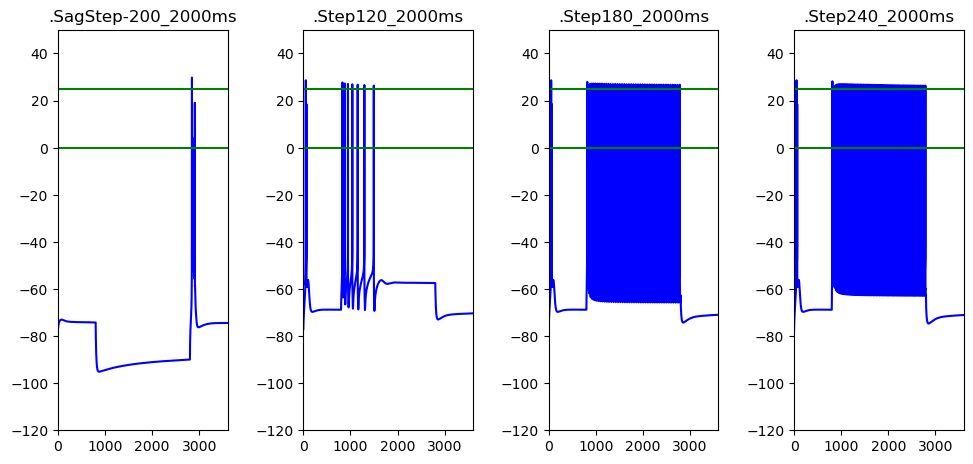

AP too tall



lesioned 6880 4 | 20
AP_amplitude:	 78.4 	<<<


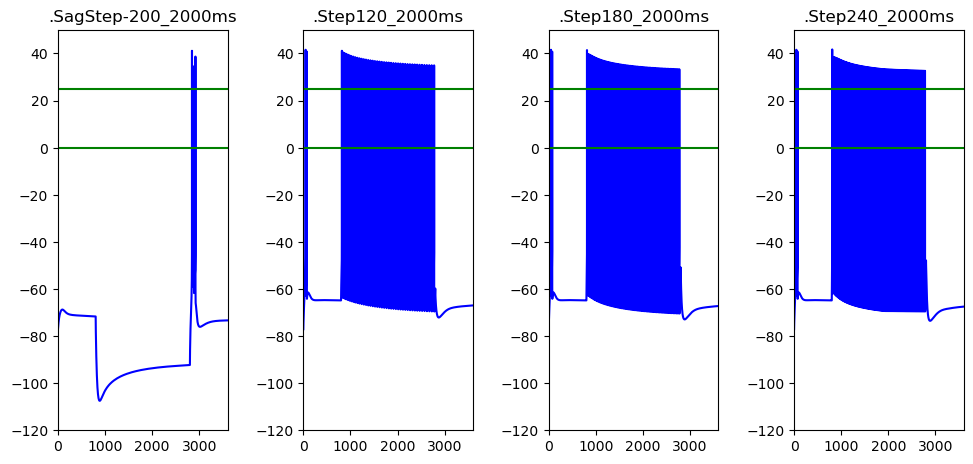

AP too tall



lesioned 7630 3 | 21
AP_amplitude:	 49.1 	


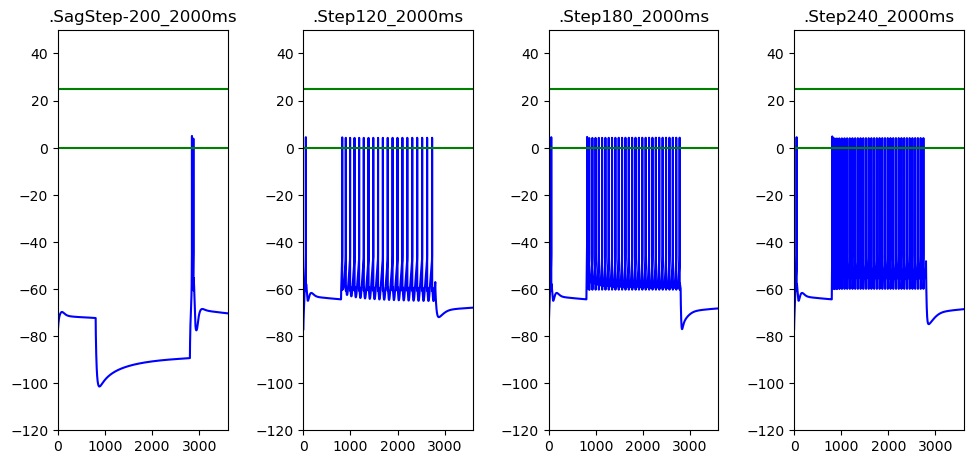





lesioned 7635 4 | 22
AP_amplitude:	 85.2 	<<<


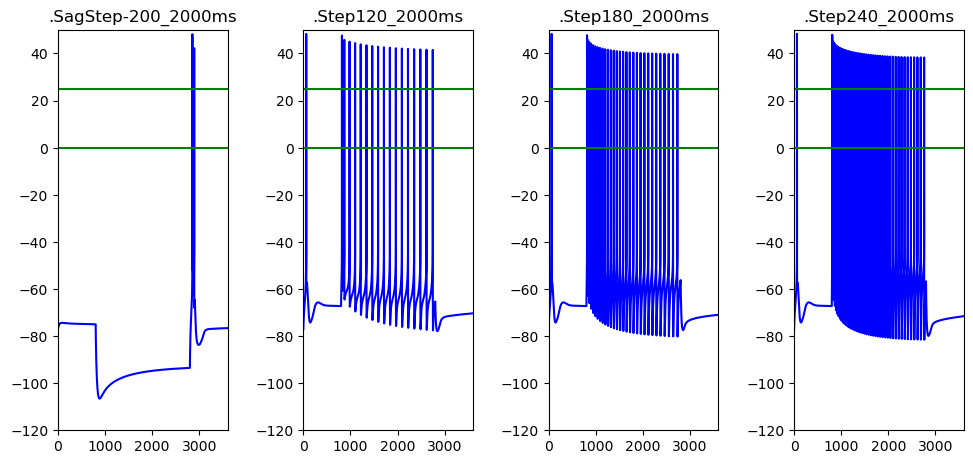

AP too tall



lesioned 8089 4 | 23
AP_amplitude:	 83.6 	<<<


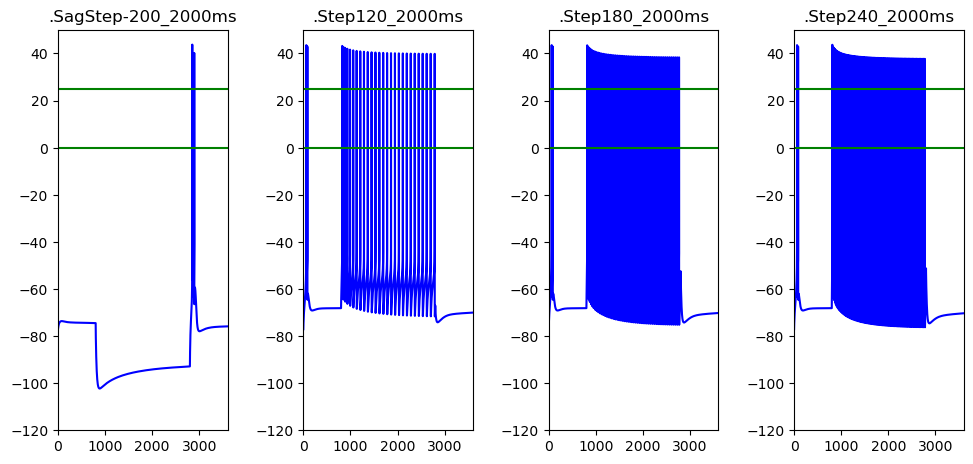

AP too tall



lesioned 8637 0 | 24
AP_amplitude:	 74.3 	<<<


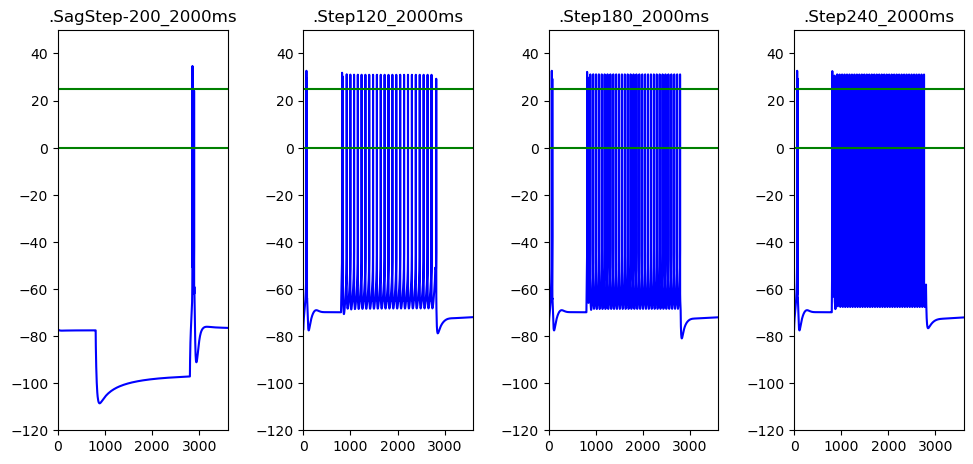

AP too tall



lesioned 8828 0 | 25
AP_amplitude:	 40.9 	


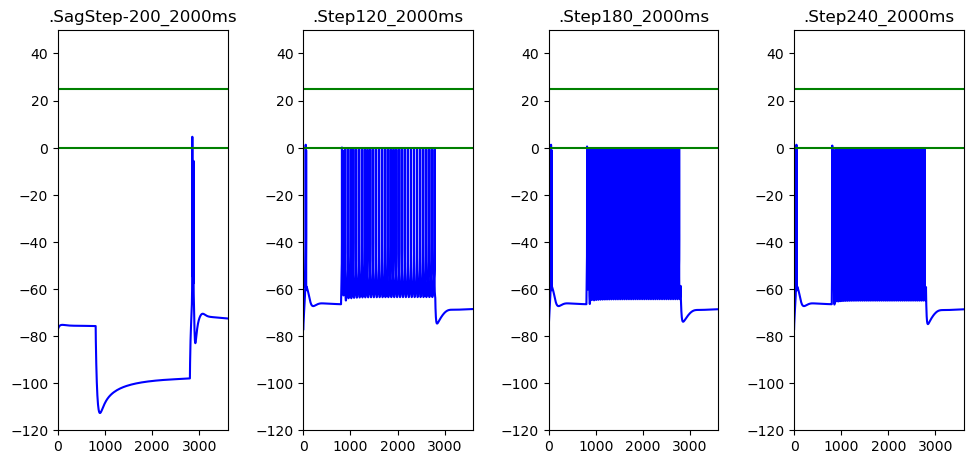





lesioned 8895 4 | 26
AP_amplitude:	 28.4 	<<<


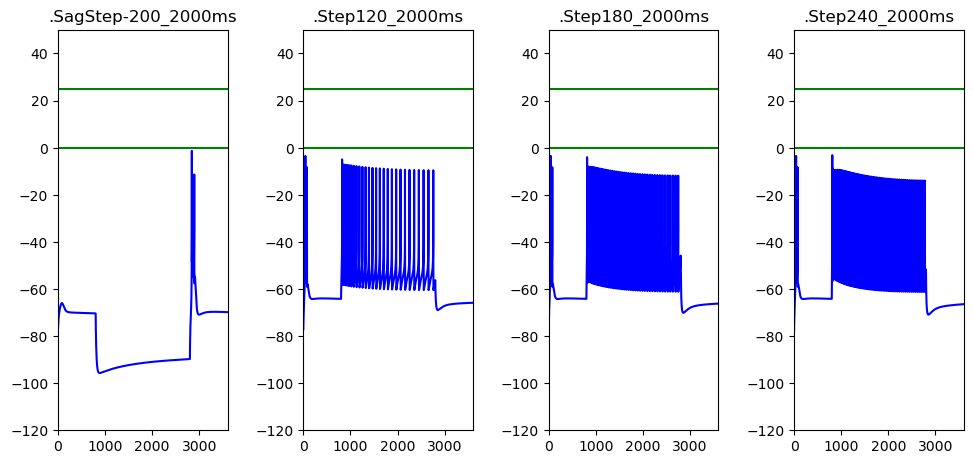

AP too short



lesioned 9006 2 | 27
AP_amplitude:	 57.1 	


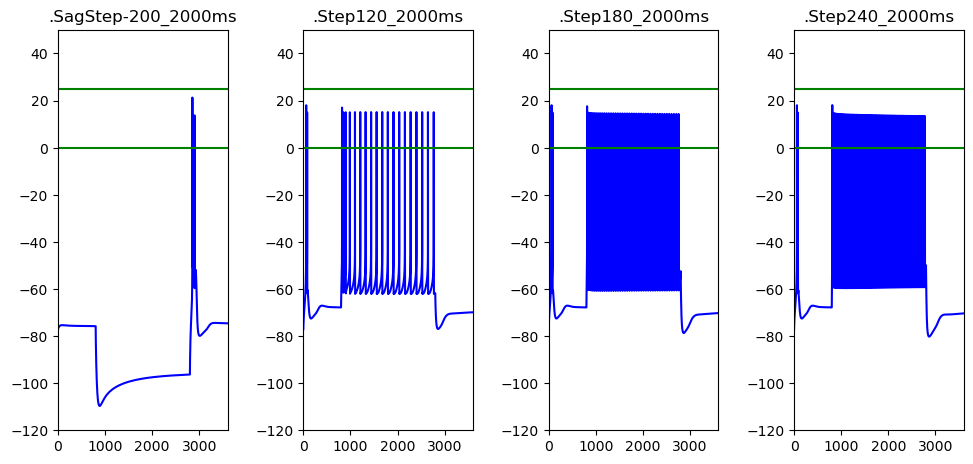





lesioned 9074 4 | 28
AP_amplitude:	 77.3 	<<<


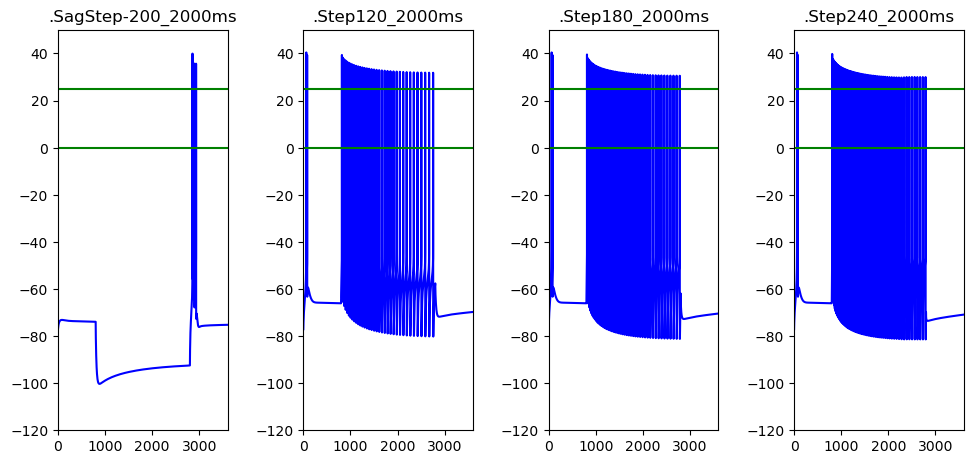

AP too tall



lesioned 9857 2 | 29
AP_amplitude:	 23.4 	<<<


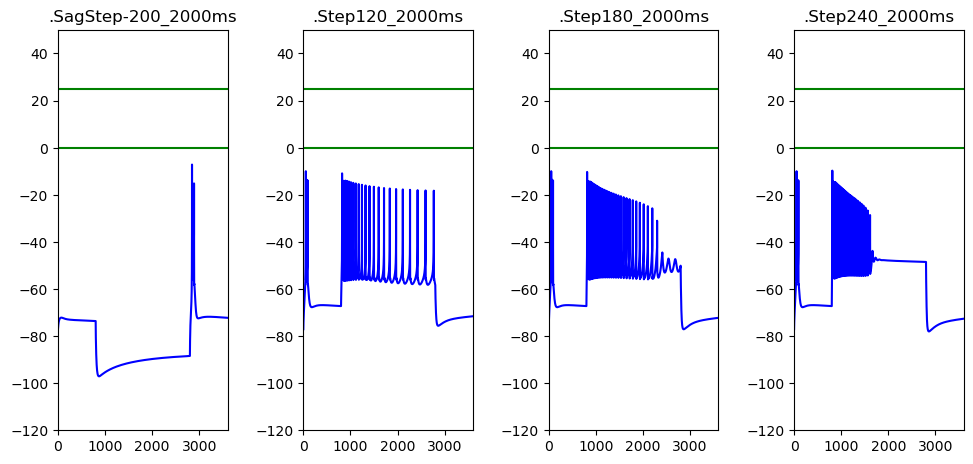

AP too short



lesioned 10613 1 | 30
AP_amplitude:	 68.0 	<<<


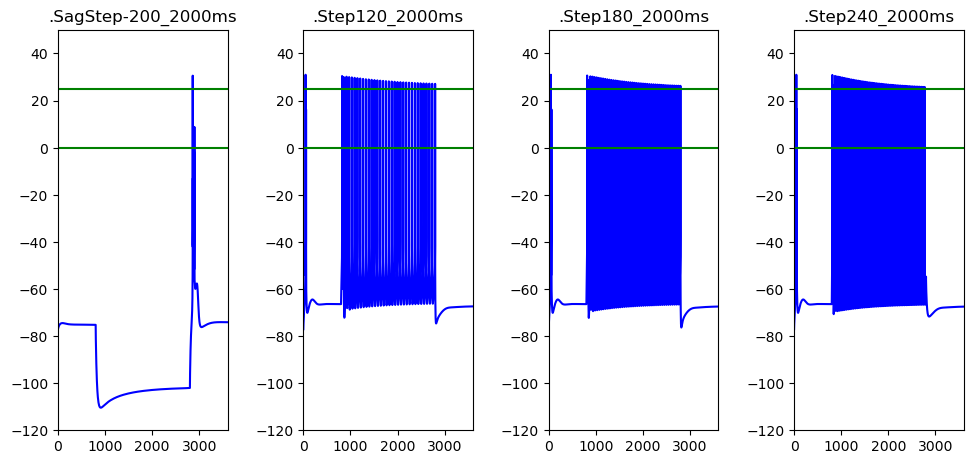

AP too tall



lesioned 10626 4 | 31
AP_amplitude:	 45.2 	


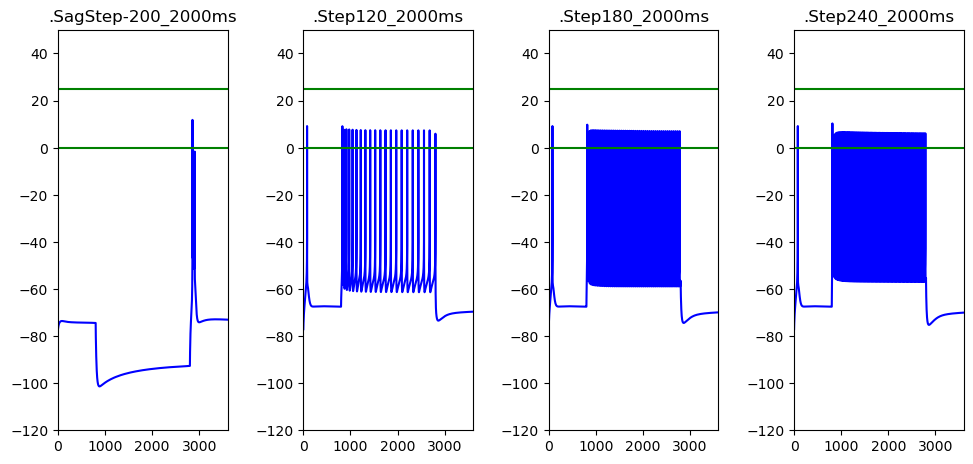





lesioned 13076 4 | 32
AP_amplitude:	 68.0 	<<<


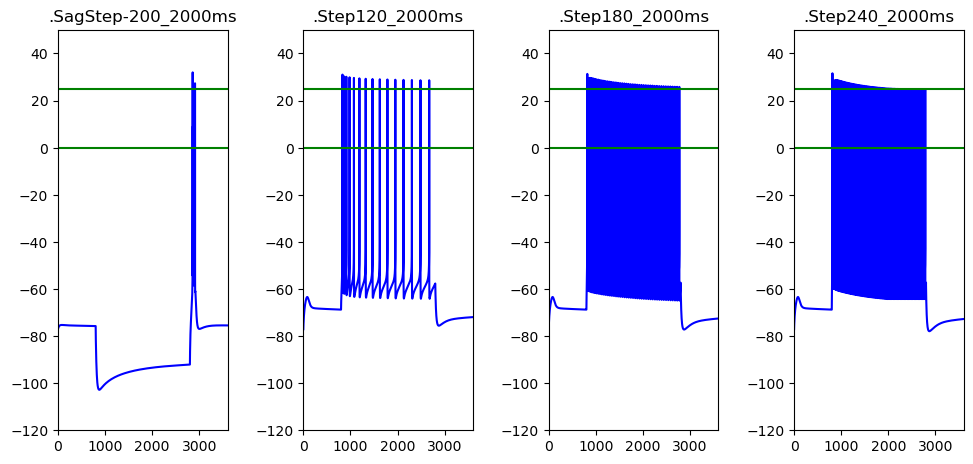

AP too tall



lesioned 14293 1 | 33
AP_amplitude:	 55.6 	


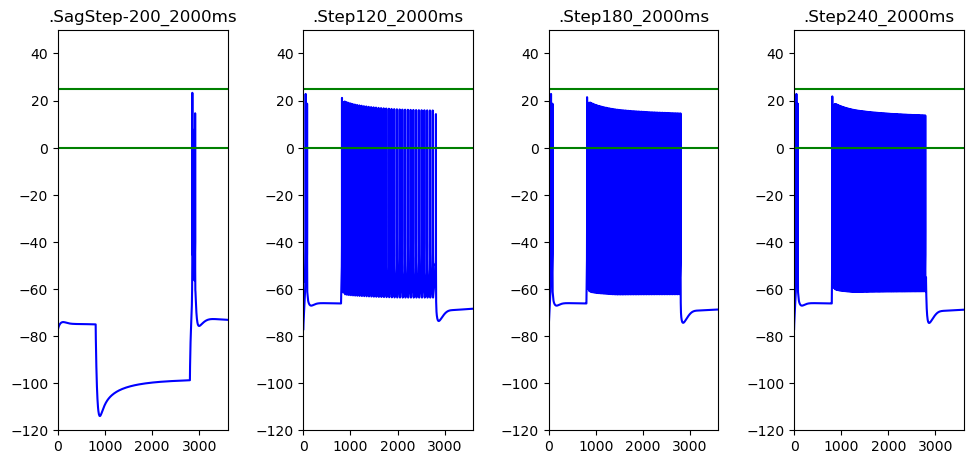





lesioned 14404 4 | 34
AP_amplitude:	 58.9 	


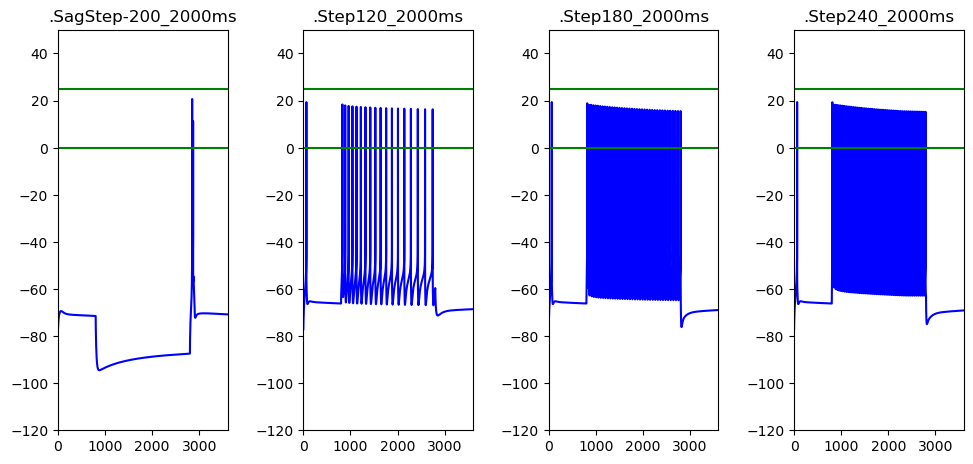





lesioned 14477 3 | 35
AP_amplitude:	 84.7 	<<<


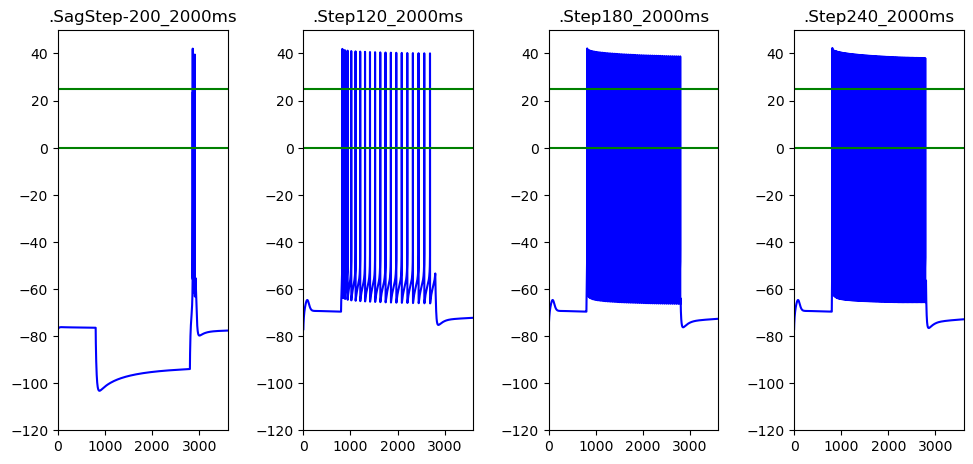

AP too tall



lesioned 14639 4 | 36
AP_amplitude:	 55.1 	


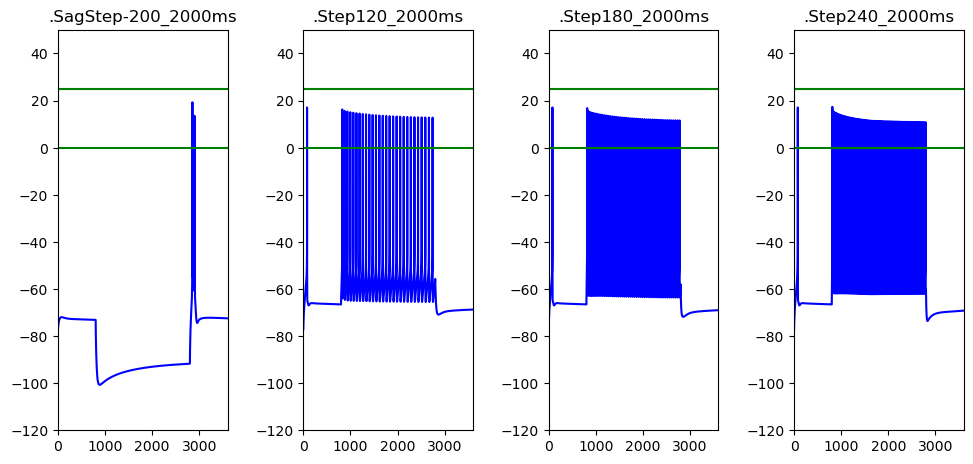





lesioned 15220 3 | 37
AP_amplitude:	 32.8 	<<<


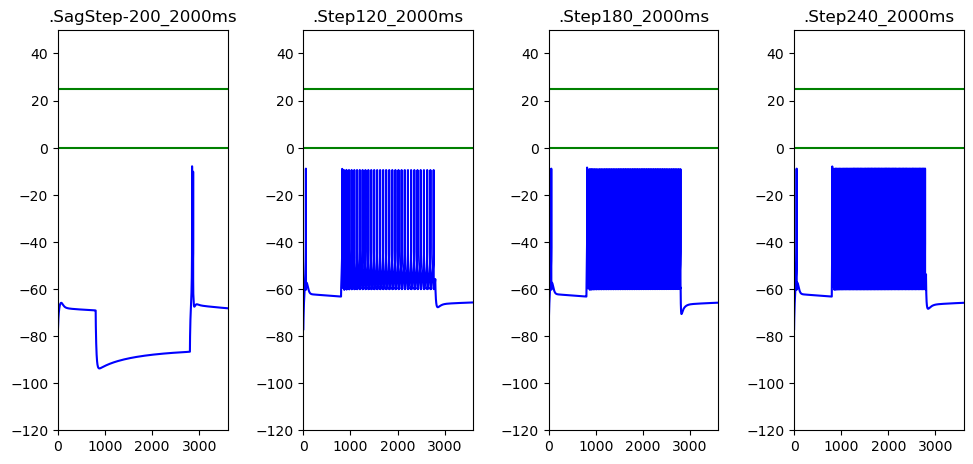

AP too short



lesioned 15241 4 | 38
AP_amplitude:	 67.0 	<<<


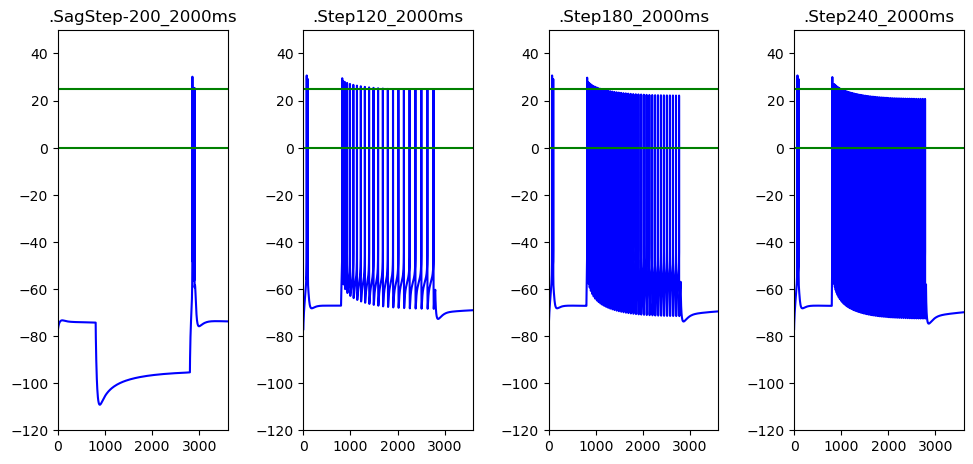

AP too tall



lesioned 15846 3 | 39
AP_amplitude:	 62.9 	<<<


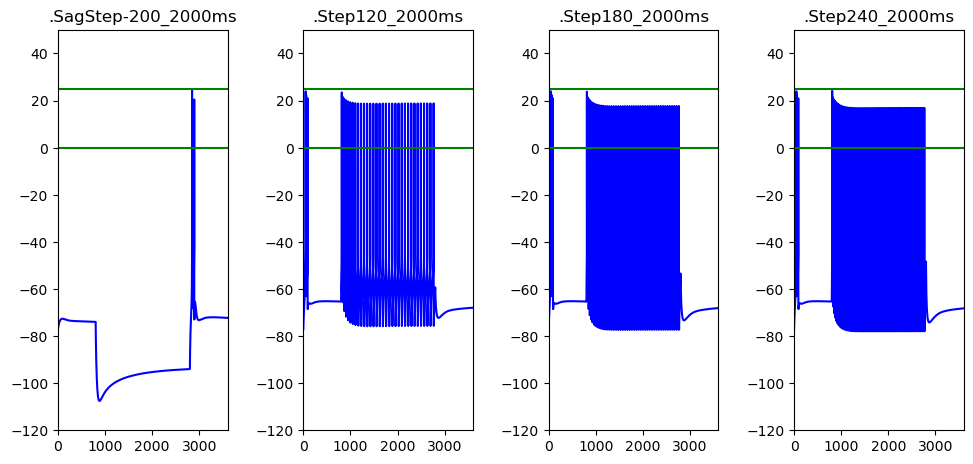

AP too tall



lesioned 16025 3 | 40
AP_amplitude:	 59.5 	


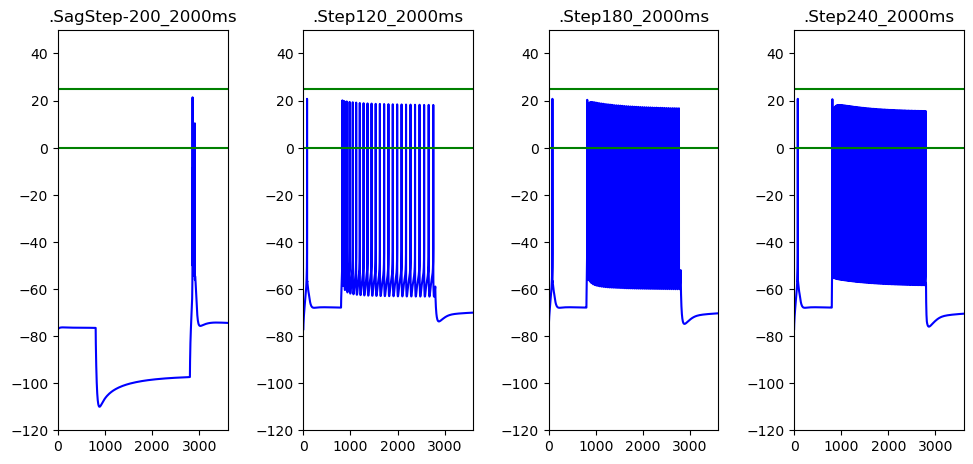





lesioned 16213 3 | 41
AP_amplitude:	 48.1 	


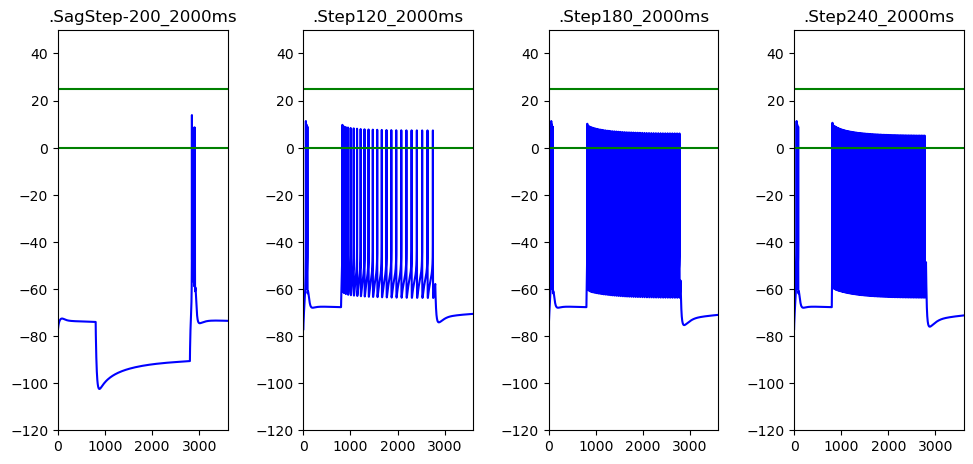





lesioned 16481 3 | 42
AP_amplitude:	 40.8 	


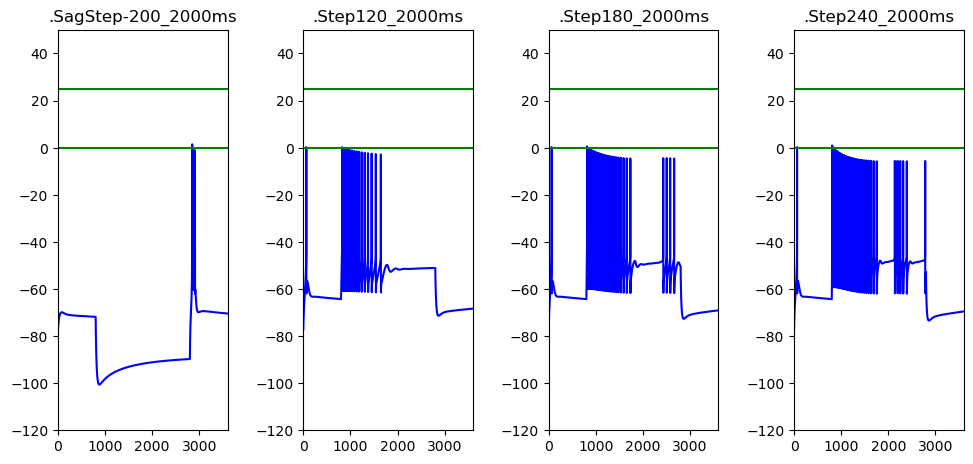





lesioned 16803 4 | 43
AP_amplitude:	 64.3 	<<<


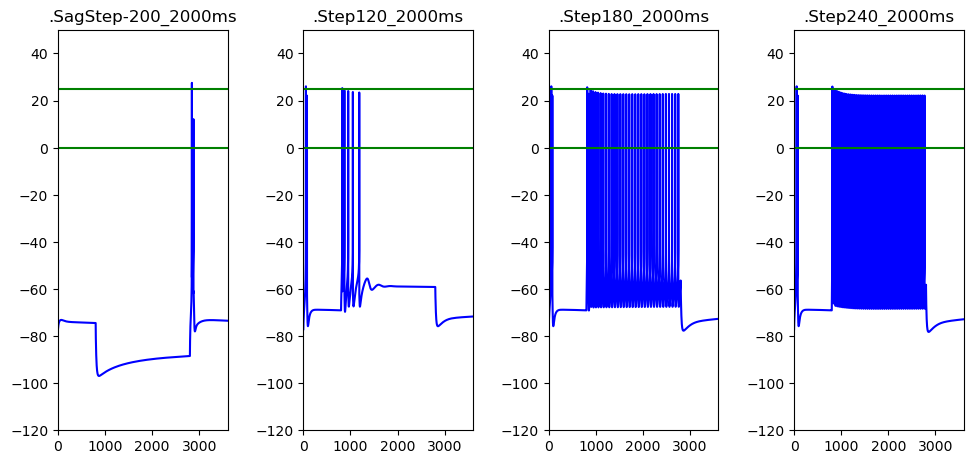

AP too tall



lesioned 16824 0 | 44
AP_amplitude:	 30.7 	<<<


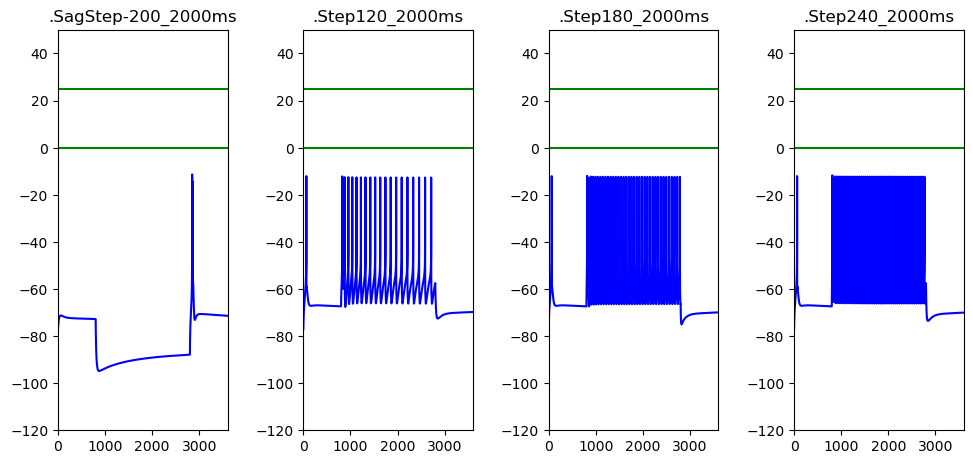

AP too short



lesioned 16875 4 | 45
AP_amplitude:	 85.3 	<<<


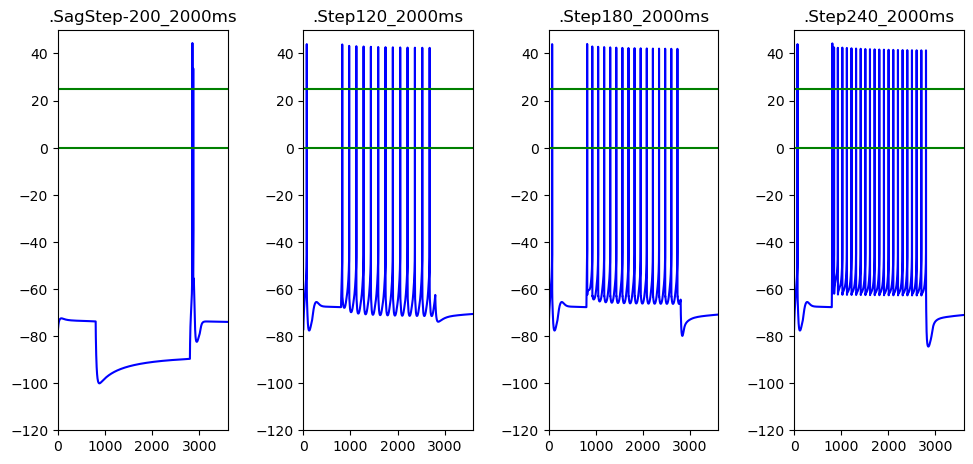

AP too tall



lesioned 17694 4 | 46
AP_amplitude:	 80.6 	<<<


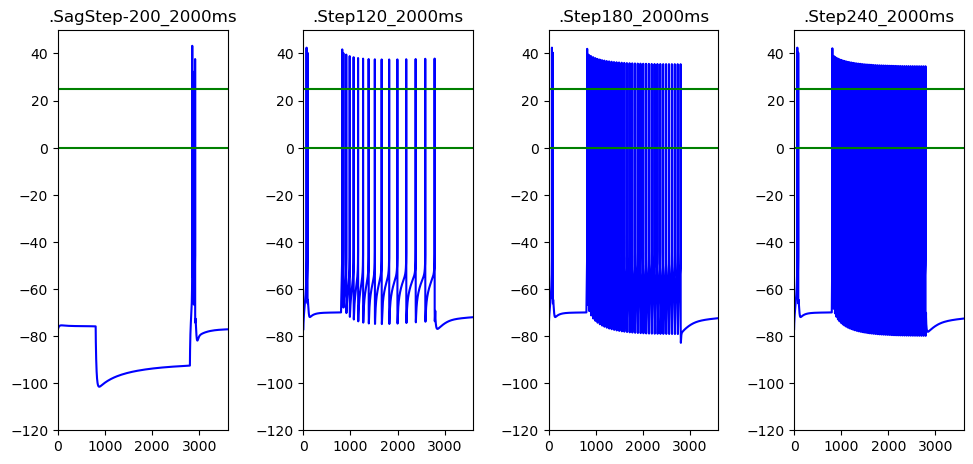

AP too tall



lesioned 18243 4 | 47
AP_amplitude:	 39.0 	


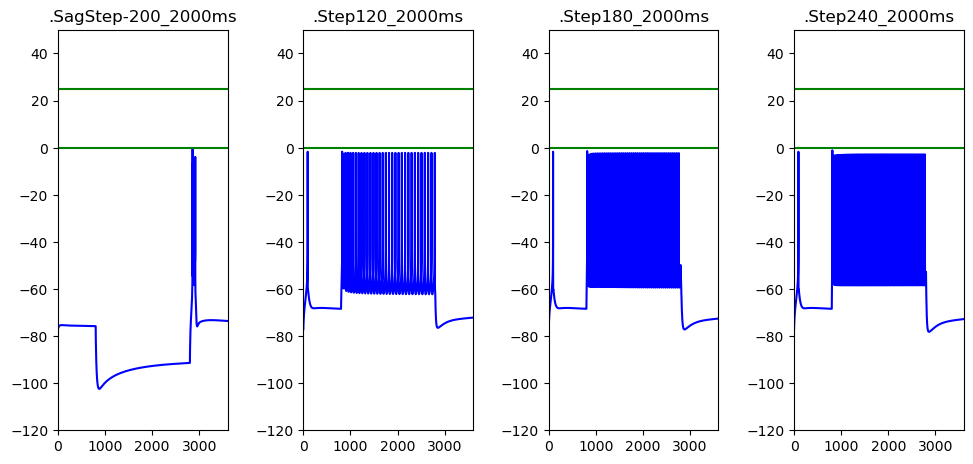





lesioned 18244 3 | 48
AP_amplitude:	 44.0 	


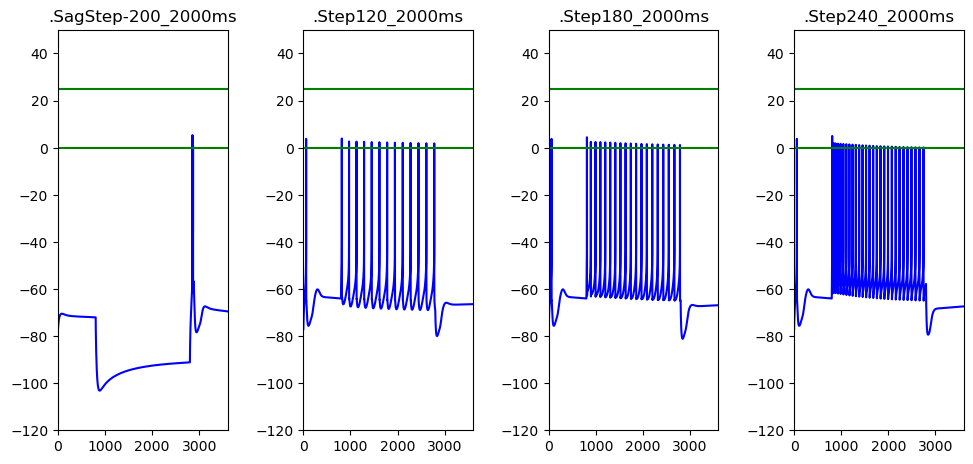





lesioned 18412 4 | 49
AP_amplitude:	 65.9 	<<<


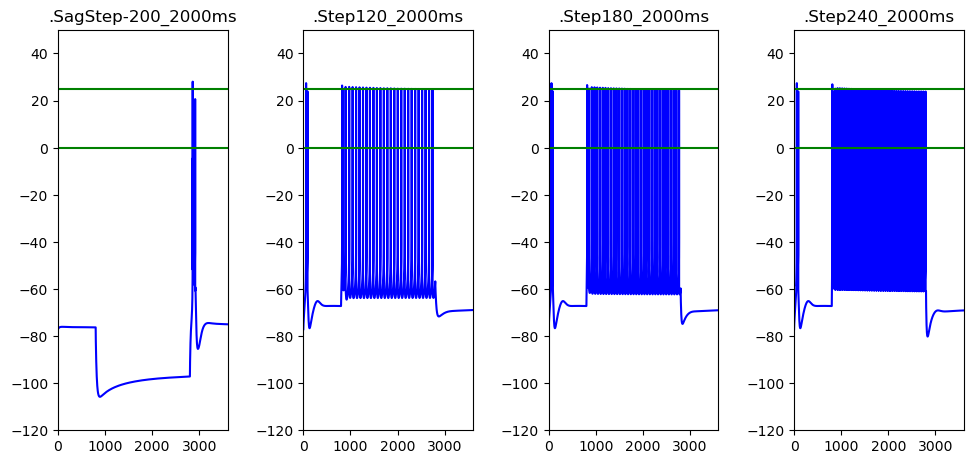

AP too tall



lesioned 18697 3 | 50
AP_amplitude:	 37.8 	


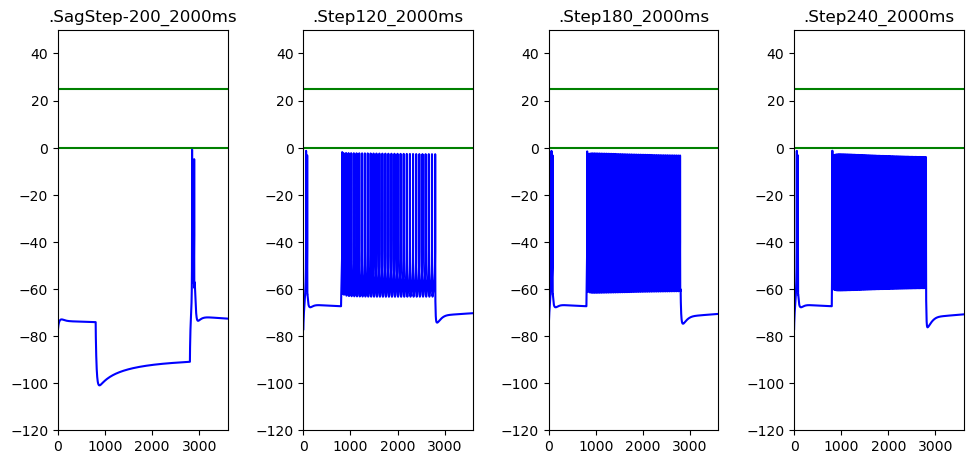





lesioned 19253 0 | 51
AP_amplitude:	 22.3 	<<<


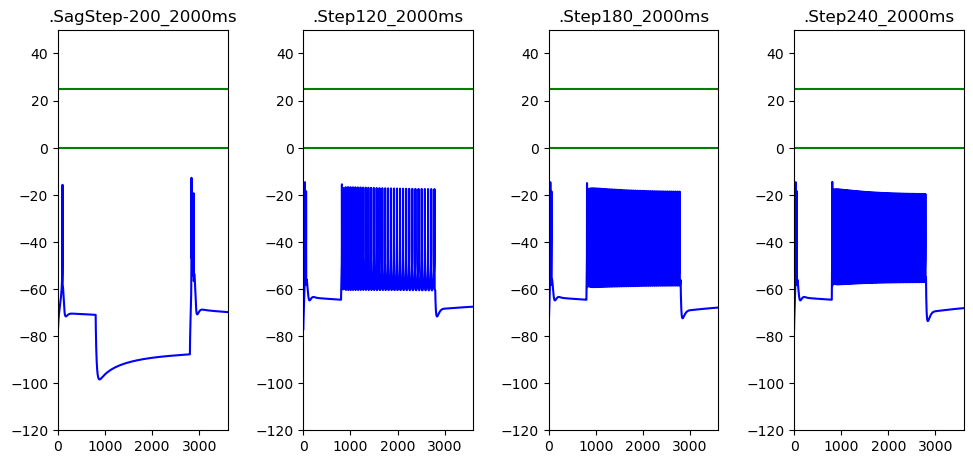

AP too short



lesioned 19271 3 | 52
AP_amplitude:	 62.2 	<<<


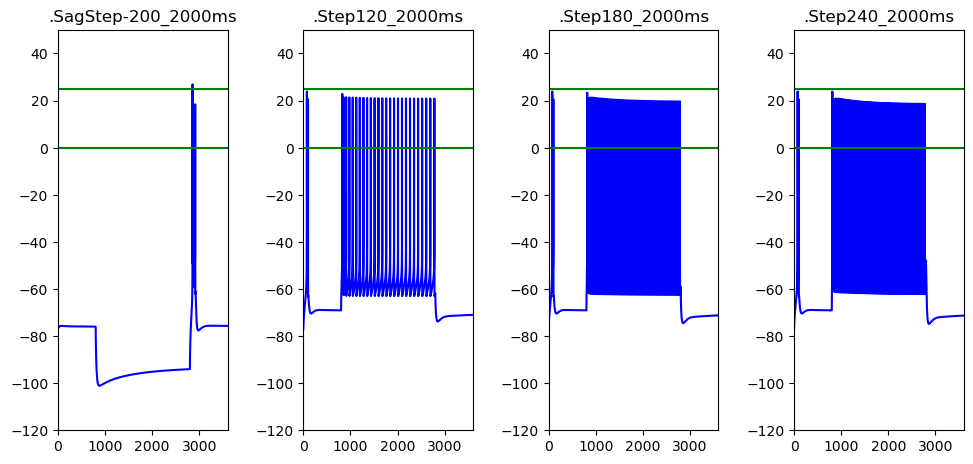

AP too tall





In [36]:
ap_amp_min = 35
ap_amp_max = 60

for i in range(n):
    trace = np.load('/home/francesco/trace_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    ap_amp = []
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }
            out = eFELExt.efel.getFeatureValues([tt], ['AP_amplitude'])[0]
            if out['AP_amplitude'] is not None:
                ap_amp.append(np.mean(out['AP_amplitude']))
    ap_amp = np.mean(ap_amp)
    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-120, 50])
        
    plt.tight_layout(pad=2)
    print('AP_amplitude:\t', round(ap_amp, 1), '\t' if ap_amp >= ap_amp_min and ap_amp <= ap_amp_max else '\t<<<')
    plt.show()

    
    if ap_amp < ap_amp_min:
        note[i] = 'AP too short'
    elif ap_amp > ap_amp_max:
        note[i] = 'AP too tall'
    
        
    print(note[i])
    print('\n\n')

# AHP depth check

control 14014 9 | 3


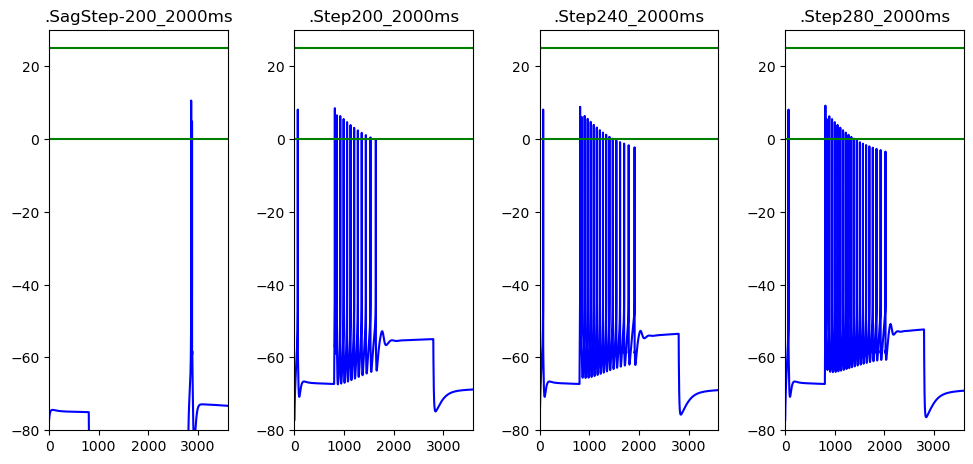





control 16021 5 | 5


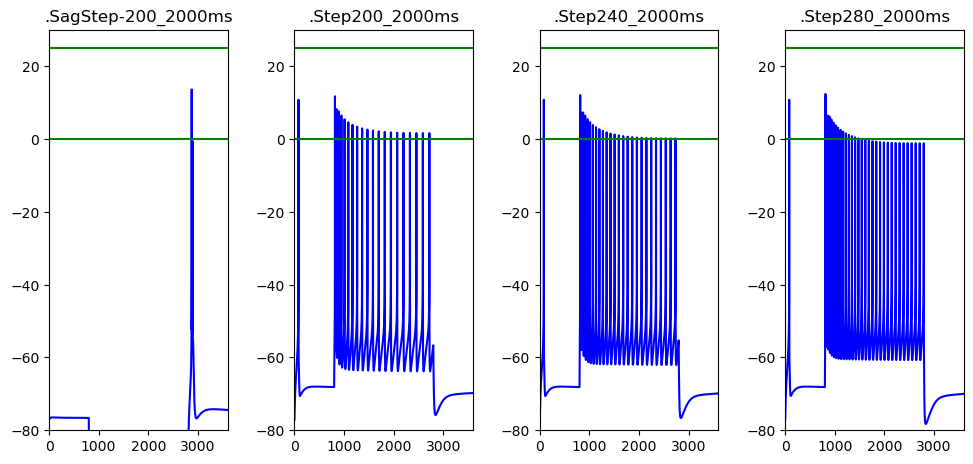





lesioned 1061 2 | 9


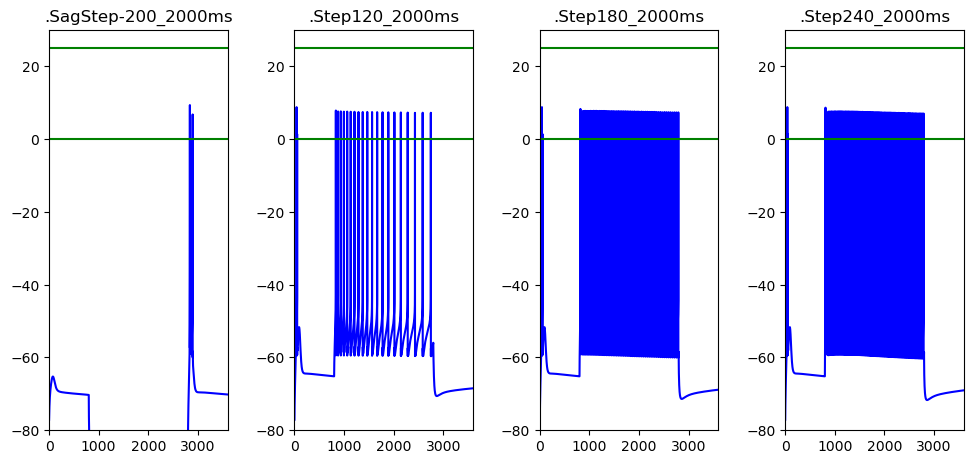





lesioned 3235 1 | 13


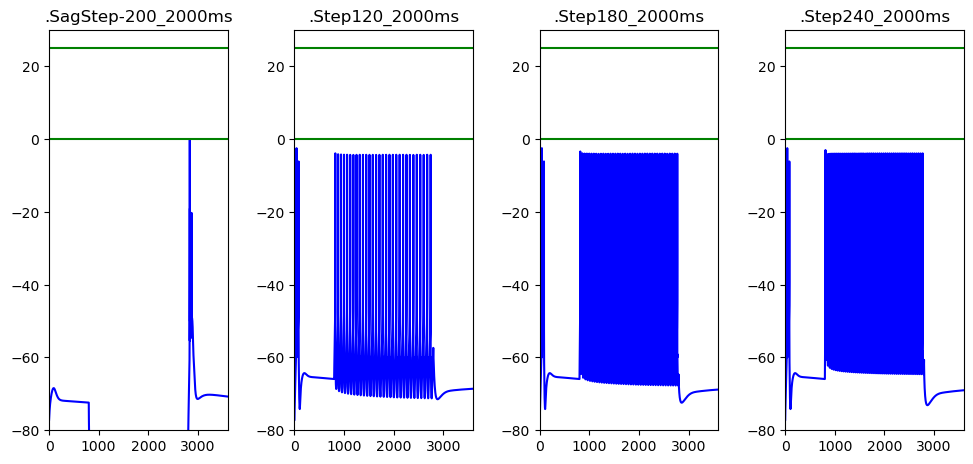





lesioned 4685 4 | 15


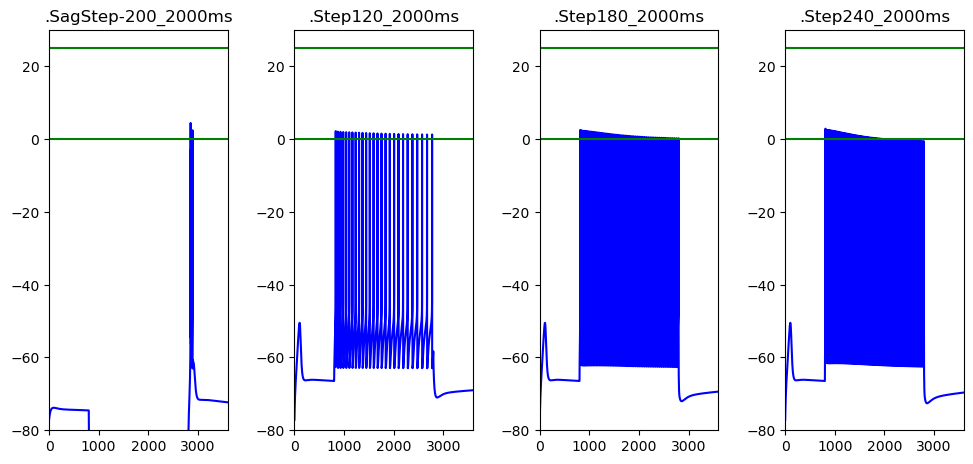





lesioned 7630 3 | 21


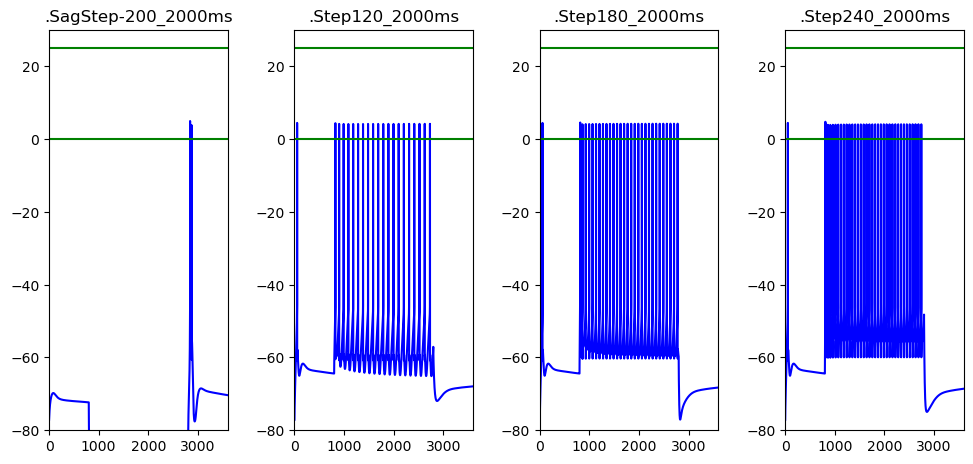





lesioned 8828 0 | 25


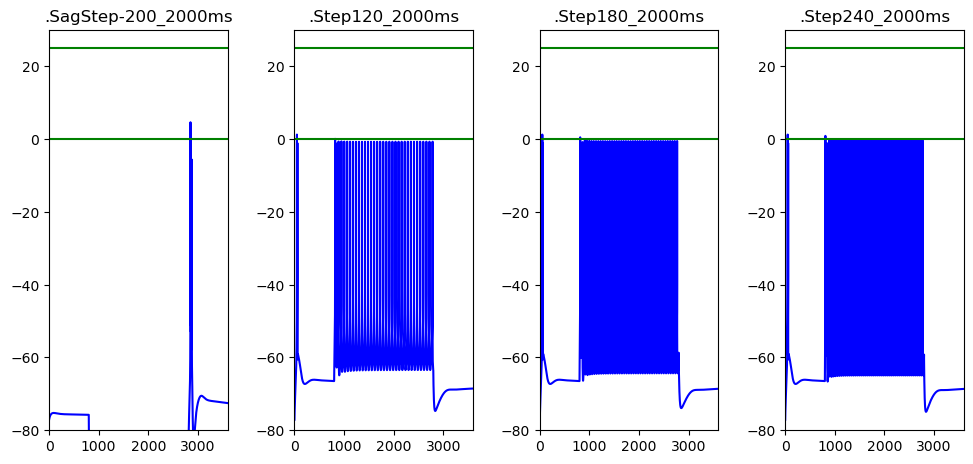





lesioned 9006 2 | 27


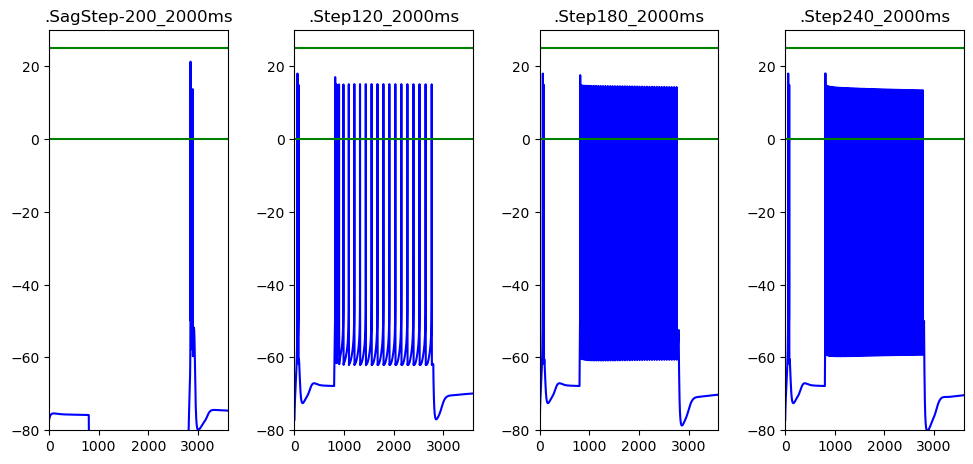





lesioned 10626 4 | 31


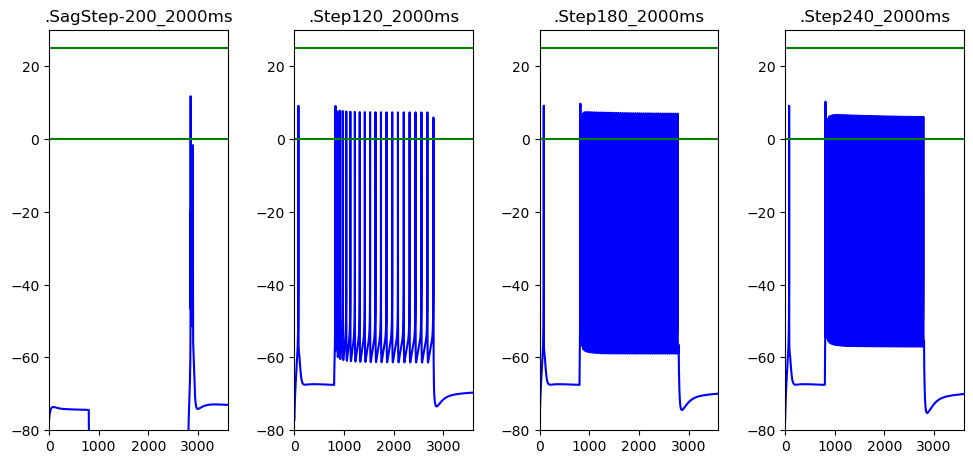





lesioned 14293 1 | 33


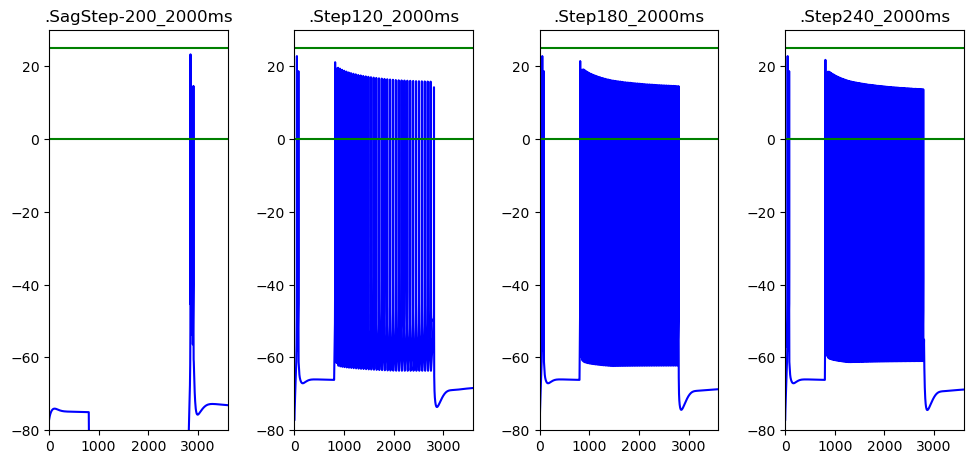





lesioned 14404 4 | 34


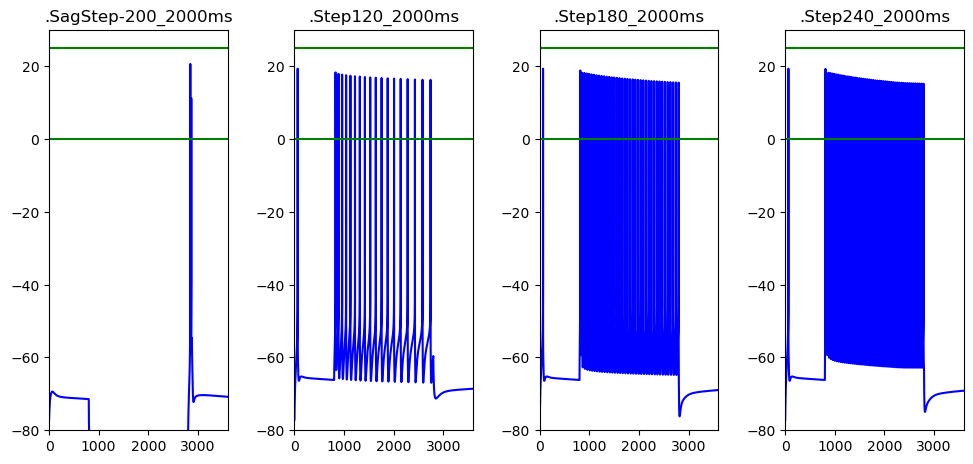





lesioned 14639 4 | 36


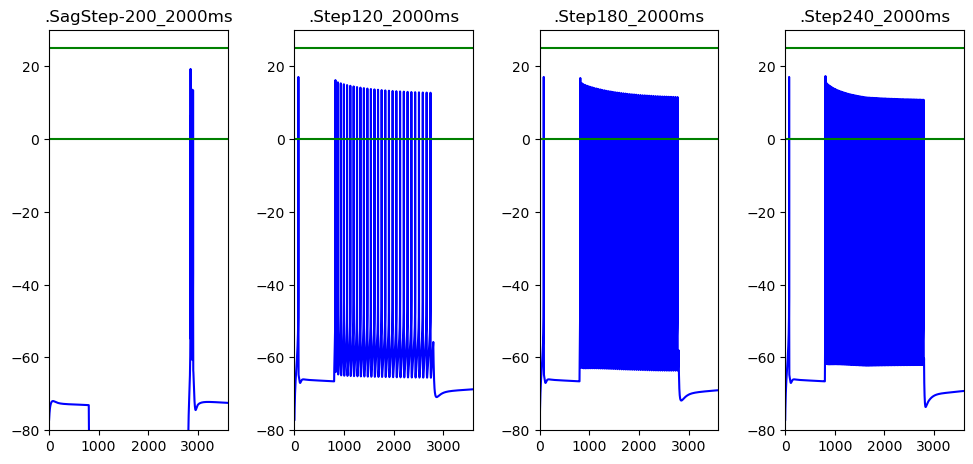





lesioned 16025 3 | 40


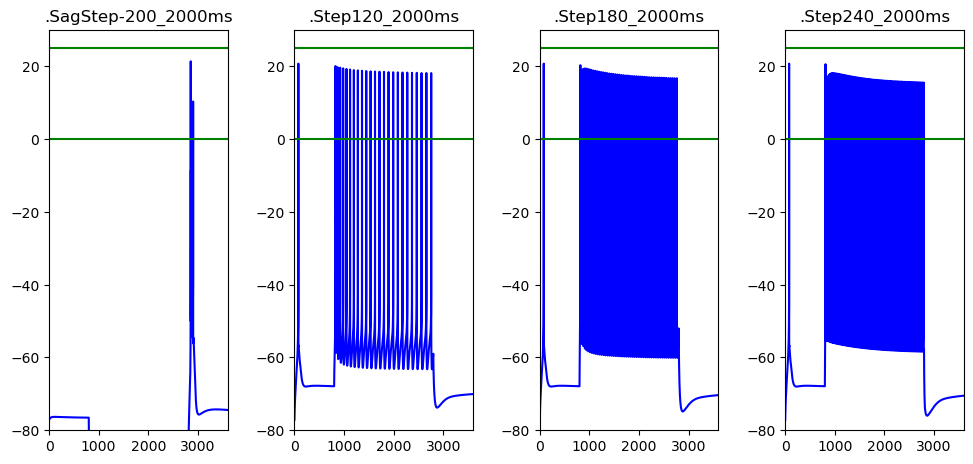





lesioned 16213 3 | 41


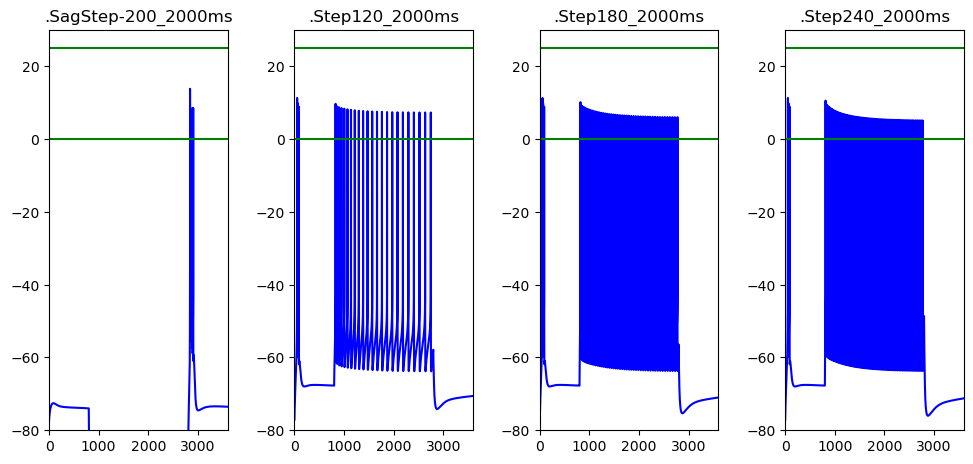





lesioned 16481 3 | 42


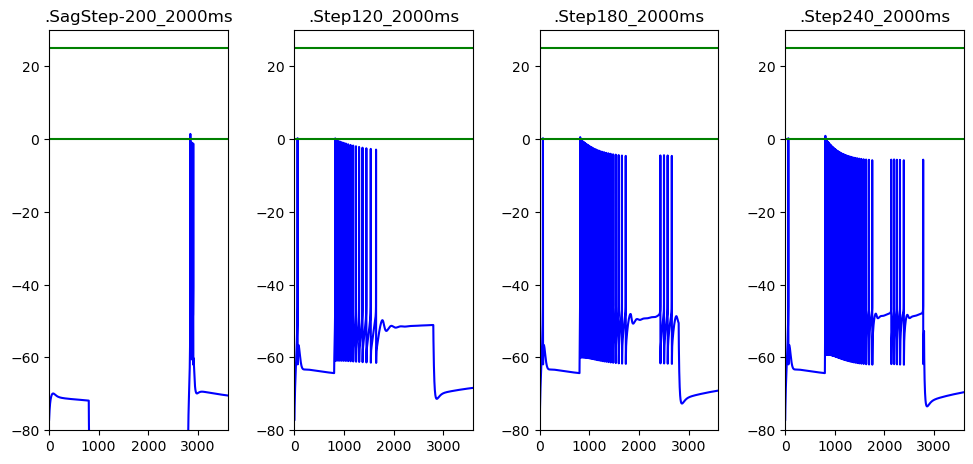





lesioned 18243 4 | 47


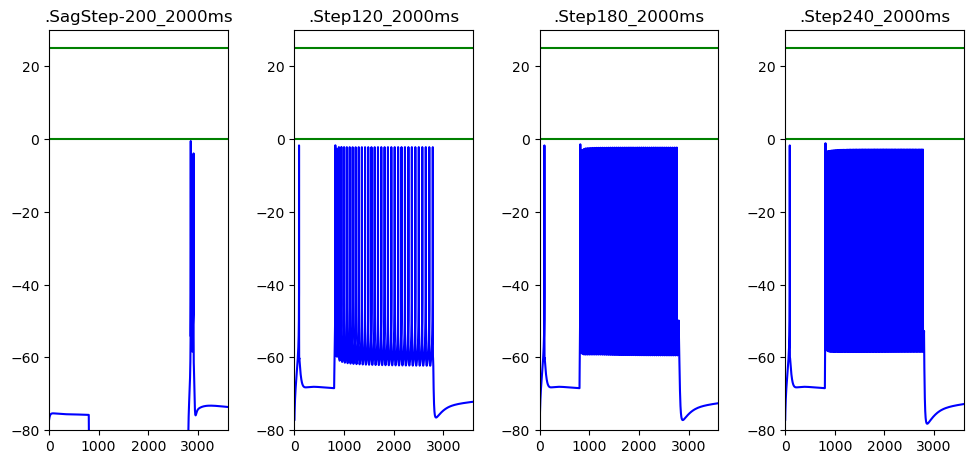





lesioned 18244 3 | 48


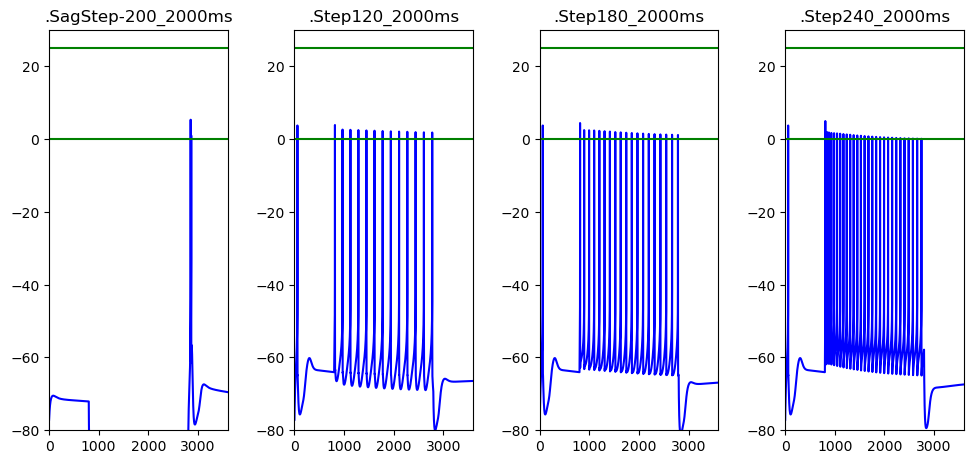





lesioned 18697 3 | 50


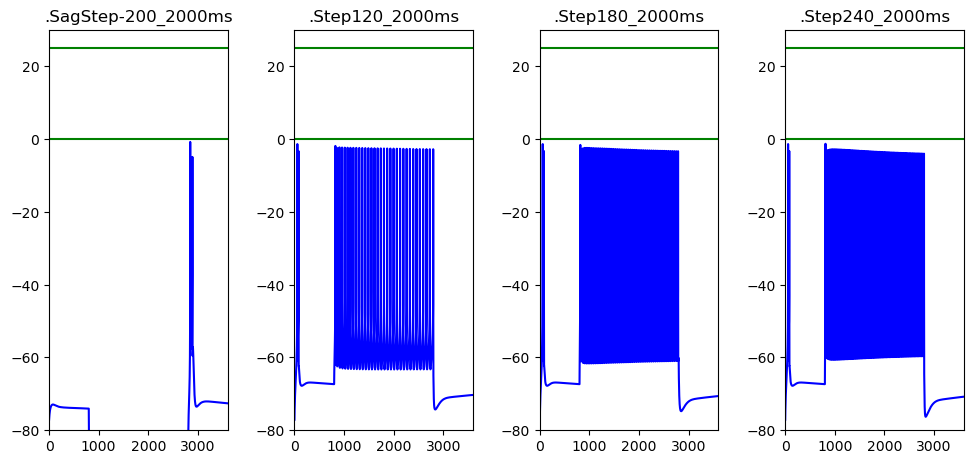

In [38]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('/home/francesco/trace_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()
        
        
    print(note[i])
    print('\n\n')

In [39]:
for i in [ 13, 48 ]:
    note[i] = 'AHP too low'

In [40]:
# output selected neurons
hof_chk1 = np.load('hof_3sd_good_1.npy', allow_pickle=True).tolist()
hof_chk1_keys = sorted(list(hof_chk1.keys()))
hof_chk2 = {}
for i, k in enumerate(hof_chk1_keys):
    if len(note[i]) == 0:
        hof_chk2[k] = hof_chk1[k]
np.save('hof_3sd_good_2.npy', hof_chk2, allow_pickle=True)

In [41]:
import pandas as pd
pd.DataFrame(list(hof_chk2.keys()))[0].value_counts()

lesioned    14
control      2
Name: 0, dtype: int64